### Water Quality Dataset for Crop
Water Quality Parameters Dataset (for potato crop)

The 'Potato Crop Water Quality Parameters Dataset' includes essential water quality metrics crucial for optimal potato growth. This comprehensive dataset covers parameters such as pH levels, solids, organic carbon, and sulfate, offering valuable insights into the specific water quality requirements necessary to cultivate healthy and high-yielding potato crops. Researchers and farmers can use this data to make informed decisions regarding irrigation and soil management, ensuring the successful growth of potato plants while optimizing resource utilization and crop productivity.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the data
water_quality = pd.read_csv("water_quality_.csv")
water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [3]:
# Checking datatypes
water_quality.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Check                int64
dtype: object

In [4]:
# Checking for all missing values
water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Check                0
dtype: int64

#### Filling all missing values with the mean

In [5]:
# Filling the "ph" column
water_quality["ph"].fillna(water_quality["ph"].mean(), inplace=True)

# Filling the "Sulfate" column
water_quality["Sulfate"].fillna(water_quality["Sulfate"].mean(), inplace=True)

# Filling the "Trihalomethanes" column
water_quality["Trihalomethanes"].fillna(water_quality["Trihalomethanes"].mean(), inplace=True)

In [6]:
# Rechecking for missing values
water_quality.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

In [7]:
water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,7.080795,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


### Plotting the data disribution

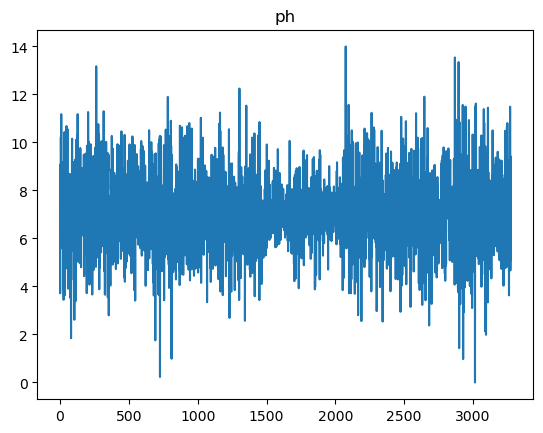

In [20]:
fig, ax = plt.subplots()
ax.plot(water_quality["ph"]);
plt.title("ph");

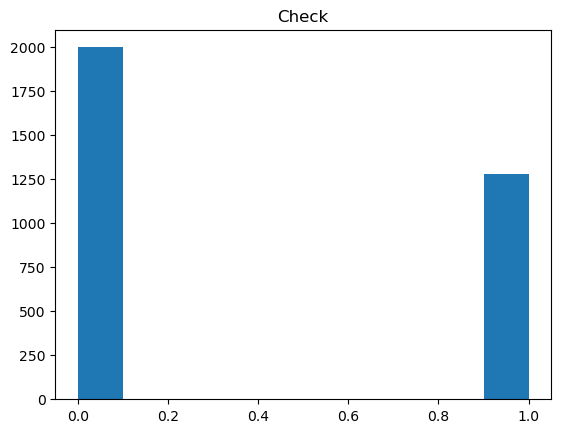

In [18]:
# Checking the distribution of Check data
fig, ax = plt.subplots()
ax.hist(water_quality["Check"])
plt.title("Check");

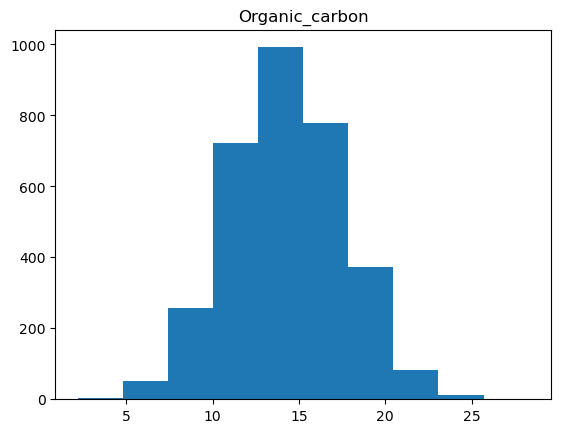

In [19]:
# Checking the distribution of Check data
fig, ax = plt.subplots()
ax.hist(water_quality["Organic_carbon"])
plt.title("Organic_carbon");

### Splitting the Data into train & test splits

In [25]:
x = water_quality.drop("Check", axis=1)
y = water_quality["Check"]
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075


#### Designing the model



In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3)

# Using SVM 
from sklearn import svm 
clf = svm.SVC()
# Fiiting the svm model
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.6225839267548321

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Instantiating the model
clf = RandomForestClassifier()
# Fitting the model
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.6826042726347915

### Evaluating the model


In [33]:
y_pred = clf.predict(x_test)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       796
           1       0.33      0.66      0.44       187

    accuracy                           0.68       983
   macro avg       0.61      0.67      0.61       983
weighted avg       0.79      0.68      0.71       983



### Saving the model

In [35]:
from joblib import dump, load

# save model to file
dump(clf, filename="clf_random_forest_water_quality_model.joblib")

['clf_random_forest_water_quality_model.joblib']